In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("synthetic_car_data_150_rows.csv") #currently doing with dataset that has date and values testing for time series
df.head
#df['date'] = df['date'].astype(str)

# Strip any leading/trailing whitespace
#df['date'] = df['date'].str.strip()

# Convert the 'date' column to datetime, coercing errors
#df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for any 'NaT' values that failed to convert
#invalid_dates = df[df['date'].isna()]
#if not invalid_dates.empty:
    #print("Entries that could not be converted:")
    #print(invalid_dates)

# Verify the conversion
print(df.dtypes)
print(df.head())


cars    int64
dtype: object
   cars
0     6
1    19
2    14
3    10
4     7


In [2]:
df.head()

,cars
0,6
1,19
2,14
3,10
4,7


In [3]:
#ts=df['cars'].resample('D').sum or .mean
#we may choose to resample the data per day or weekly, here there is no minutes rule so we have to ensure the data coming in is already
#minutes wise

<Axes: >

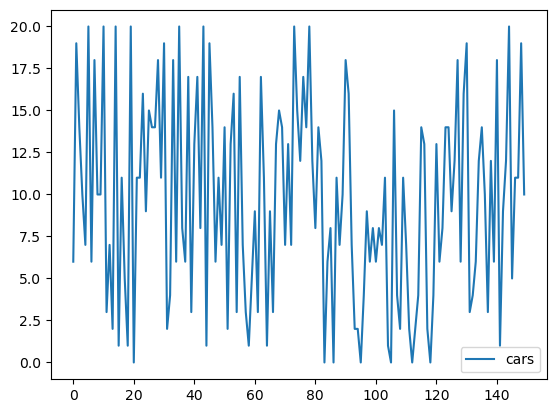

In [4]:
#df.plot(x='date',y='cars')
df.plot()


**Stationarity check: we can do ACF and PCAF checks here**

In [5]:
import statsmodels.api as sm
print(df.dtypes)


cars    int64
dtype: object


In [6]:
train = df[:105]
test= df[105:]

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



print(train.dtypes)
print(train.head())

cars    int64
dtype: object
   cars
0     6
1    19
2    14
3    10
4     7


ACF Values: [ 1.         -0.11477316  0.21478471  0.14896983 -0.12079618  0.21069707
 -0.12639067  0.13986026 -0.06217217  0.05573849 -0.03240412 -0.08630094
  0.03205693 -0.057493   -0.01898635 -0.08673663 -0.04410907 -0.06449789
 -0.05513326 -0.03299657 -0.0029162  -0.09150854  0.03309513 -0.08422738
 -0.03986151 -0.02759885 -0.03490484  0.04068497  0.02407345  0.01846282
 -0.07630964 -0.05722763 -0.00208826  0.03151927  0.02333654  0.02666003
  0.15292117 -0.05592808  0.11308343  0.04145227  0.04055126  0.07462874
 -0.07834436  0.07515877  0.06024008  0.04505357  0.11076431 -0.01488594
  0.09516694  0.00474027 -0.01099452 -0.03215901]
PACF Values: [ 1.         -0.11587675  0.20832513  0.20935239 -0.144487    0.1242711
 -0.07586748  0.10794563 -0.08411704  0.08453856 -0.10591193 -0.05255206
 -0.04424772  0.06288681 -0.08184331 -0.08006575 -0.06736804 -0.02090662
 -0.04293376 -0.01233886  0.04980921 -0.12202993  0.04435984 -0.08183763
 -0.01243368 -0.10507874  0.05905856  0.00142785  

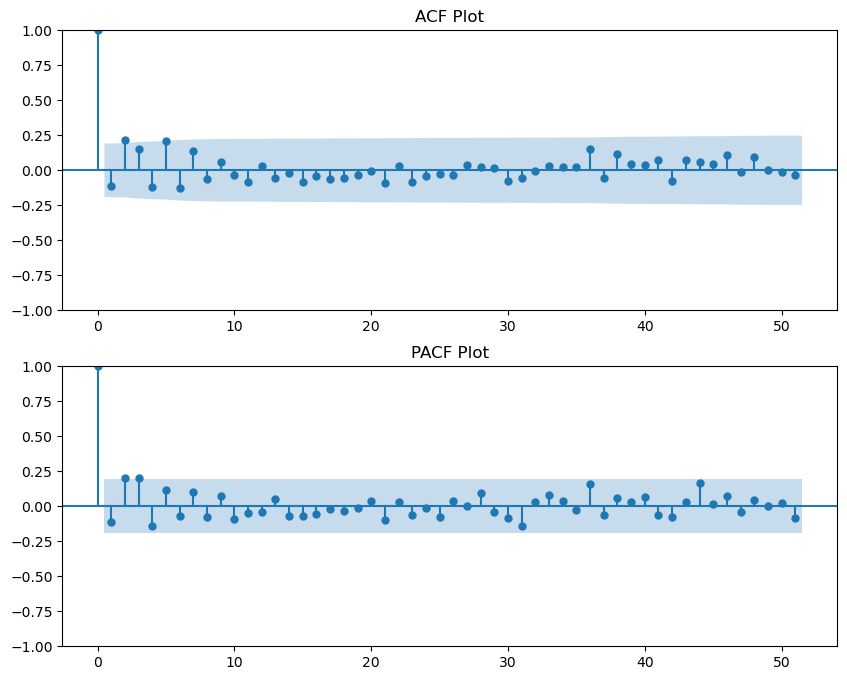

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# Assuming train is your DataFrame
max_lags = 51  # Set to the maximum number of lags that works

# Calculate ACF and PACF values
acf_values = acf(train["cars"], nlags=max_lags)
pacf_values = pacf(train["cars"], nlags=max_lags)

# Store in variables
acf_original = acf_values
pacf_original = pacf_values

# Print the ACF and PACF values
print("ACF Values:", acf_original)
print("PACF Values:", pacf_original)

# Plot ACF with the current number of lags
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train["cars"], lags=max_lags, ax=ax[0])
ax[0].set_title('ACF Plot')

# Plot PACF with the current number of lags
plot_pacf(train["cars"], lags=max_lags, ax=ax[1])
ax[1].set_title('PACF Plot')

plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train["cars"])
print(f'p-value: {adf_test[1]}')

p-value: 0.0003629884316275633


In [10]:

import pmdarima as pm
#auto_arima = pm.auto_arima(train["cars"], stepwise=False, seasonal=False)
#auto_arima
auto_arima = pm.auto_arima(train["cars"],
                              start_p=0, max_p=5,
                              start_q=0, max_q=5,
                              seasonal=False, # Set True if you expect seasonality
                              stepwise=True,
                              trace=True)
auto_arima


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=814.548, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=745.020, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=783.019, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=703.814, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=688.224, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=690.217, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=683.663, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=683.668, Time=0.16 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=681.140, Time=0.36 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=681.038, Time=0.34 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=685.852, Time=0.15 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=678.296, Time=0.47 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=676.297, Time=0.39 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=682.312, Time=0.25 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=678.2

ARIMA(order=(3, 0, 1), scoring_args={}, suppress_warnings=True)

In [11]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  105
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -328.187
Date:                Wed, 21 Aug 2024   AIC                            668.374
Time:                        13:19:47   BIC                            684.297
Sample:                             0   HQIC                           674.826
                                - 105                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.3979      3.227      4.152      0.000       7.074      19.722
ar.L1         -0.8679      0.127     -6.816      0.000      -1.117      -0.618
ar.L2          0.1560      0.135      1.158      0.247      -0.108       0.420
ar.L3          0.3596      0.108      3.332      0.001       0.148       0.571
ma.L1          0.8249      0.111      7.459      0.000       0.608       1.042
sigma2        30.1730      6.037      4.998      0.000      18.340      42.006
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.85
Prob(Q):                              0.98   Prob(JB):                         0.15
Heteroskedasticity (H):               0.87   Skew:                             0.01
Prob(H) (two-sided):                  0.69   Kurtosis:                         2.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

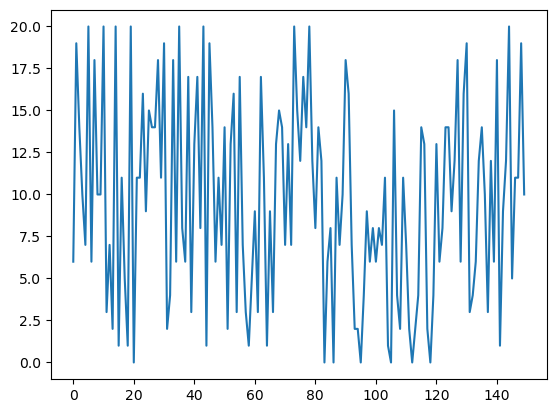

In [12]:
forecast_test_auto = auto_arima.predict(n_periods=len(test))
df['forecast_auto'] = [None]*len(train) + list(forecast_test_auto)

df["cars"].plot()

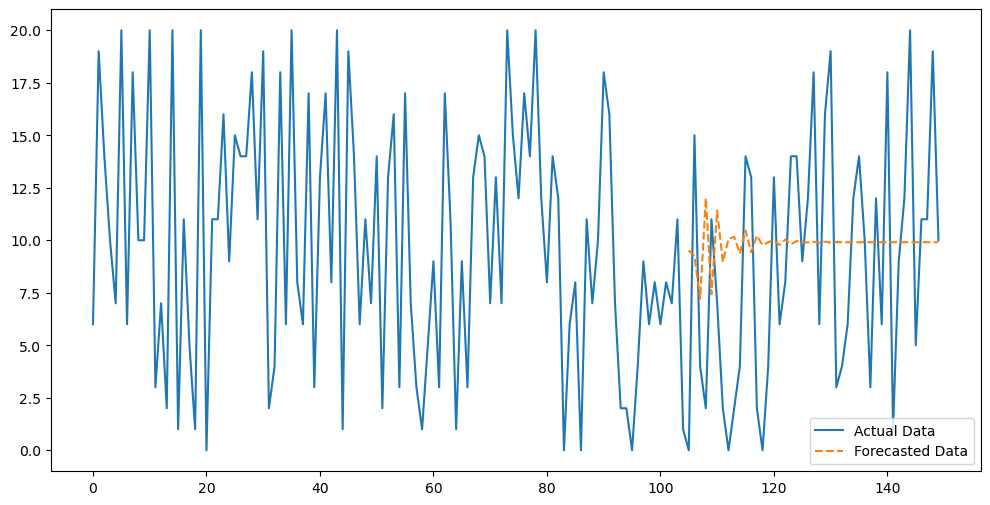

In [13]:
import matplotlib.pyplot as plt


# Ensure the forecast is aligned with the test data
forecast_test_auto = auto_arima.predict(n_periods=45)

# Create a new series that combines the train data with the forecast
df['forecast_auto'] = [None]*len(train) + list(forecast_test_auto)

# Plot the actual data and the forecasted data
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df["cars"], label='Actual Data')

# Plot forecasted data
plt.plot(df['forecast_auto'], label='Forecasted Data', linestyle='--')

plt.legend()
plt.show()


In [14]:
#def predict_future(data, start_index, periods, model):
    # Select the data up to the start index for model training
    #train_data = data[:start_index]
    
    # Fit the ARIMA model to the selected training data
    #model.fit(train_data)
    
    #Predict for the number of periods specified
    #future_forecast = model.predict(n_periods=periods)
    
    #return future_forecast

    #-------

#def predict_future(data, start_index, periods_to_predict, model):
  
def predict_future(data, start_index, periods, model):
    """
    Predict future values using the ARIMA model and plot the results.
    
    Parameters:
        data (pd.Series): The historical time series data.
        start_index (int): The index to start forecasting from.
        periods (int): The number of periods to forecast.
        model: The ARIMA model.
        
    Returns:
        pd.Series: Forecasted values.
    """
    # Select the data up to the start index for model training
    train_data = data[:start_index]
    
    # Fit the ARIMA model to the selected training data
    model.fit(train_data)
    
    # Predict for the number of periods specified
    future_forecast = model.predict(n_periods=periods)
    
    # Prepare the data for plotting
    forecast_index = list(range(start_index, start_index + periods))
    forecast_series = pd.Series(future_forecast, index=forecast_index)
    
    # Plot the actual data and forecasted data
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data, label='Actual Data', color='blue')
    plt.plot(forecast_series.index, forecast_series, label='Forecasted Data', color='red', linestyle='--')
    
    plt.xlabel('Index')
    plt.ylabel('Vehicle Count')
    plt.title('Traffic Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return future_forecast

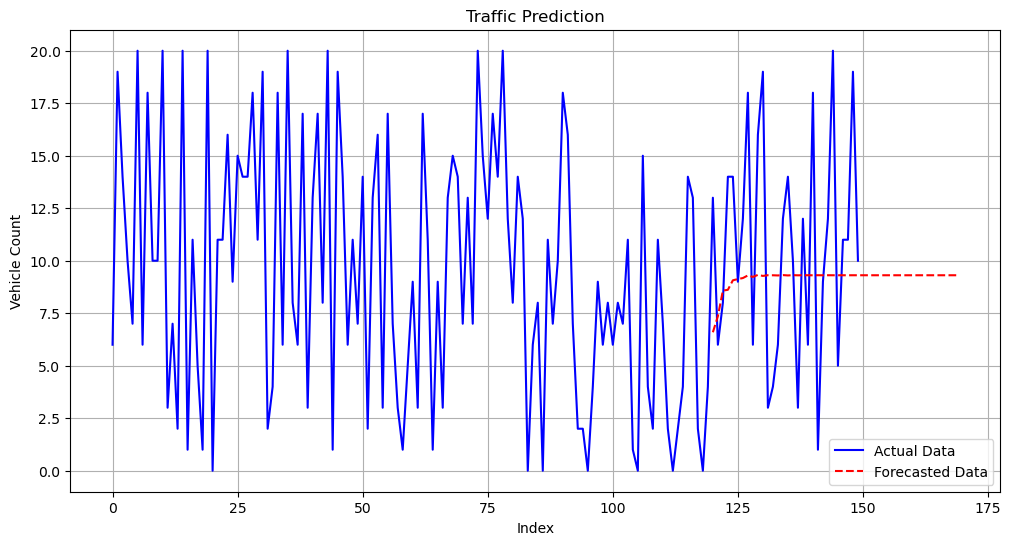

Predictions from index 120 for the next 50 periods:
120    6.593051
121    7.355679
122    8.577045
123    8.615080
124    9.068201
125    9.125173
126    9.175744
127    9.299283
128    9.228591
129    9.325346
130    9.276431
131    9.309607
132    9.306741
133    9.298565
134    9.315864
135    9.299476
136    9.313067
137    9.304988
138    9.308429
139    9.308784
140    9.306392
141    9.309548
142    9.306690
143    9.308758
144    9.307639
145    9.307950
146    9.308195
147    9.307676
148    9.308244
149    9.307775
150    9.308081
151    9.307941
152    9.307951
153    9.308021
154    9.307919
155    9.308017
156    9.307943
157    9.307986
158    9.307971
159    9.307966
160    9.307982
161    9.307963
162    9.307979
163    9.307968
164    9.307974
165    9.307973
166    9.307971
167    9.307974
168    9.307971
169    9.307973
dtype: float64


In [16]:
#start_index = 50  # Replace with your desired start index
#periods_to_predict = 30  # Number of periods to predict into the future

# Assuming 'auto_arima' is the trained model and 'df["cars"]' is your data
#future_predictions = predict_future(df["cars"], start_index, periods_to_predict, auto_arima)

#print(f"Predictions from index {start_index} for the next {periods_to_predict} periods:")
#print(future_predictions)

#----
#future_forecast = predict_future(df['cars'], start_index, periods_to_predict, auto_arima)
    
#print(f"Forecasted values:\n{future_forecast}")






start_index = 120 # Example start index
periods_to_predict = 50 # Number of periods to forecast
future_predictions = predict_future(df['cars'], start_index, periods_to_predict, auto_arima)
    
print(f"Predictions from index {start_index} for the next {periods_to_predict} periods:")
print(future_predictions)
